In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
%matplotlib inline
import matplotlib.pyplot as plt


### Get Training Dataset

In [2]:
df_train_X = pd.read_csv(r'trainData/train_set.csv')
df_train_y = pd.read_csv(r'trainData/train_target_set.csv')

In [3]:
df_train_X

,Unnamed: 0,Sequence0,Sequence1,Sequence2,Sequence3,Sequence4,Sequence5,Sequence6,Sequence7,Sequence8,...,Sequence230,Sequence231,Sequence232,Sequence233,Sequence234,Sequence235,Sequence236,Sequence237,Sequence238,Sequence239
0,2017-01-03,-0.191444,0.085315,-0.222894,0.173375,-0.348694,-0.254344,0.456424,-0.166284,-0.027905,...,1.349602,-0.524813,-0.499654,-0.273214,0.097895,0.418684,-0.575133,0.299175,-0.726093,0.663994
1,2017-01-04,0.085315,-0.222894,0.173375,-0.348694,-0.254344,0.456424,-0.166284,-0.027905,-0.053065,...,-0.524813,-0.499654,-0.273214,0.097895,0.418684,-0.575133,0.299175,-0.726093,0.663994,-0.279504
2,2017-01-05,-0.222894,0.173375,-0.348694,-0.254344,0.456424,-0.166284,-0.027905,-0.053065,0.424974,...,-0.499654,-0.273214,0.097895,0.418684,-0.575133,0.299175,-0.726093,0.663994,-0.279504,-0.027905
3,2017-01-06,0.173375,-0.348694,-0.254344,0.456424,-0.166284,-0.027905,-0.053065,0.424974,0.060155,...,-0.273214,0.097895,0.418684,-0.575133,0.299175,-0.726093,0.663994,-0.279504,-0.027905,0.104185
4,2017-01-09,-0.348694,-0.254344,0.456424,-0.166284,-0.027905,-0.053065,0.424974,0.060155,-0.078225,...,0.097895,0.418684,-0.575133,0.299175,-0.726093,0.663994,-0.279504,-0.027905,0.104185,-0.015325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365308,2019-12-05,0.116491,0.765384,-0.330804,0.727585,0.324389,0.311789,-0.015807,0.941782,0.242490,...,0.015693,4.249246,-1.326193,-0.689900,-1.584490,-1.086795,0.847284,0.015693,0.147991,-0.267804
365309,2019-12-06,0.765384,-0.330804,0.727585,0.324389,0.311789,-0.015807,0.941782,0.242490,-0.135506,...,4.249246,-1.326193,-0.689900,-1.584490,-1.086795,0.847284,0.015693,0.147991,-0.267804,-0.028407
365310,2019-12-09,-0.330804,0.727585,0.324389,0.311789,-0.015807,0.941782,0.242490,-0.135506,0.790584,...,-1.326193,-0.689900,-1.584490,-1.086795,0.847284,0.015693,0.147991,-0.267804,-0.028407,-0.815898
365311,2019-12-10,0.727585,0.324389,0.311789,-0.015807,0.941782,0.242490,-0.135506,0.790584,1.848973,...,-0.689900,-1.584490,-1.086795,0.847284,0.015693,0.147991,-0.267804,-0.028407,-0.815898,1.004782


In [4]:
df_train_y

,Date,0
0,2017-12-14,0.0
1,2017-12-15,0.0
2,2017-12-18,0.0
3,2017-12-19,0.0
4,2017-12-20,1.0
...,...,...
365308,2020-11-17,1.0
365309,2020-11-18,1.0
365310,2020-11-19,0.0
365311,2020-11-20,1.0


In [5]:
df_train_X = df_train_X.drop([df_train_X.columns[0]],axis=1)
date_df = df_train_y[df_train_y.columns[0]]
df_train_y = df_train_y.drop([df_train_y.columns[0]], axis=1)

In [6]:
df_train_X

,Sequence0,Sequence1,Sequence2,Sequence3,Sequence4,Sequence5,Sequence6,Sequence7,Sequence8,Sequence9,...,Sequence230,Sequence231,Sequence232,Sequence233,Sequence234,Sequence235,Sequence236,Sequence237,Sequence238,Sequence239
0,-0.191444,0.085315,-0.222894,0.173375,-0.348694,-0.254344,0.456424,-0.166284,-0.027905,-0.053065,...,1.349602,-0.524813,-0.499654,-0.273214,0.097895,0.418684,-0.575133,0.299175,-0.726093,0.663994
1,0.085315,-0.222894,0.173375,-0.348694,-0.254344,0.456424,-0.166284,-0.027905,-0.053065,0.424974,...,-0.524813,-0.499654,-0.273214,0.097895,0.418684,-0.575133,0.299175,-0.726093,0.663994,-0.279504
2,-0.222894,0.173375,-0.348694,-0.254344,0.456424,-0.166284,-0.027905,-0.053065,0.424974,0.060155,...,-0.499654,-0.273214,0.097895,0.418684,-0.575133,0.299175,-0.726093,0.663994,-0.279504,-0.027905
3,0.173375,-0.348694,-0.254344,0.456424,-0.166284,-0.027905,-0.053065,0.424974,0.060155,-0.078225,...,-0.273214,0.097895,0.418684,-0.575133,0.299175,-0.726093,0.663994,-0.279504,-0.027905,0.104185
4,-0.348694,-0.254344,0.456424,-0.166284,-0.027905,-0.053065,0.424974,0.060155,-0.078225,-0.002745,...,0.097895,0.418684,-0.575133,0.299175,-0.726093,0.663994,-0.279504,-0.027905,0.104185,-0.015325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365308,0.116491,0.765384,-0.330804,0.727585,0.324389,0.311789,-0.015807,0.941782,0.242490,-0.135506,...,0.015693,4.249246,-1.326193,-0.689900,-1.584490,-1.086795,0.847284,0.015693,0.147991,-0.267804
365309,0.765384,-0.330804,0.727585,0.324389,0.311789,-0.015807,0.941782,0.242490,-0.135506,0.790584,...,4.249246,-1.326193,-0.689900,-1.584490,-1.086795,0.847284,0.015693,0.147991,-0.267804,-0.028407
365310,-0.330804,0.727585,0.324389,0.311789,-0.015807,0.941782,0.242490,-0.135506,0.790584,1.848973,...,-1.326193,-0.689900,-1.584490,-1.086795,0.847284,0.015693,0.147991,-0.267804,-0.028407,-0.815898
365311,0.727585,0.324389,0.311789,-0.015807,0.941782,0.242490,-0.135506,0.790584,1.848973,-0.223705,...,-0.689900,-1.584490,-1.086795,0.847284,0.015693,0.147991,-0.267804,-0.028407,-0.815898,1.004782


In [7]:
df_train_y

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
365308,1.0
365309,1.0
365310,0.0
365311,1.0


### 2-d data to 3-d data

In [8]:
train_X = df_train_X.to_numpy()
train_y = df_train_y.to_numpy()

In [9]:
#차원 변경 및 2개의 class로 target의 데이터폼 변경
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1) #input data num / timestep / feature
train_y = to_categorical(train_y,num_classes=2)

### Train

In [10]:
# epoch 1000, batch_size = 230 validation_split = 0.2 dropout = 0.1 
model = Sequential()
model.add(LSTM(25,input_shape=(240,1) ,dropout=0.1, return_sequences=True))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=10),
             ModelCheckpoint(filepath=r'model/best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]
history = model.fit(train_X, train_y, epochs=1000, batch_size=230,
          validation_split= 0.2, callbacks=callbacks)

Epoch 1/1000
1271/1271 [==============================] - 18s 15ms/step - loss: 0.4708 - accuracy: 0.7683 - val_loss: 0.3947 - val_accuracy: 0.8317
Epoch 2/1000
1271/1271 [==============================] - 18s 14ms/step - loss: 0.4213 - accuracy: 0.8011 - val_loss: 0.3822 - val_accuracy: 0.8344
Epoch 3/1000
1271/1271 [==============================] - 16s 13ms/step - loss: 0.4140 - accuracy: 0.8048 - val_loss: 0.3677 - val_accuracy: 0.8431
Epoch 4/1000
1271/1271 [==============================] - 16s 13ms/step - loss: 0.4063 - accuracy: 0.8093 - val_loss: 0.3590 - val_accuracy: 0.8468
Epoch 5/1000
1271/1271 [==============================] - 16s 13ms/step - loss: 0.4026 - accuracy: 0.8108 - val_loss: 0.3540 - val_accuracy: 0.8488
Epoch 6/1000
1271/1271 [==============================] - 16s 13ms/step - loss: 0.3979 - accuracy: 0.8141 - val_loss: 0.3464 - val_accuracy: 0.8543
Epoch 7/1000
1271/1271 [==============================] - 17s 13ms/step - loss: 0.3940 - accuracy: 0.8161 - val_

1271/1271 [==============================] - 16s 12ms/step - loss: 0.3406 - accuracy: 0.8512 - val_loss: 0.2781 - val_accuracy: 0.8885
Epoch 57/1000
1271/1271 [==============================] - 16s 12ms/step - loss: 0.3378 - accuracy: 0.8526 - val_loss: 0.2727 - val_accuracy: 0.8930
Epoch 58/1000
1271/1271 [==============================] - 16s 12ms/step - loss: 0.3400 - accuracy: 0.8519 - val_loss: 0.2707 - val_accuracy: 0.8954
Epoch 59/1000
1271/1271 [==============================] - 16s 12ms/step - loss: 0.3411 - accuracy: 0.8515 - val_loss: 0.2740 - val_accuracy: 0.8911
Epoch 60/1000
1271/1271 [==============================] - 16s 12ms/step - loss: 0.3398 - accuracy: 0.8520 - val_loss: 0.2747 - val_accuracy: 0.8897
Epoch 61/1000
1271/1271 [==============================] - 16s 12ms/step - loss: 0.3382 - accuracy: 0.8530 - val_loss: 0.2749 - val_accuracy: 0.8935
Epoch 62/1000
1271/1271 [==============================] - 16s 12ms/step - loss: 0.3384 - accuracy: 0.8525 - val_loss: 0

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 240, 25)           2700      
_________________________________________________________________
flatten (Flatten)            (None, 6000)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 12002     
Total params: 14,702
Trainable params: 14,702
Non-trainable params: 0
_________________________________________________________________


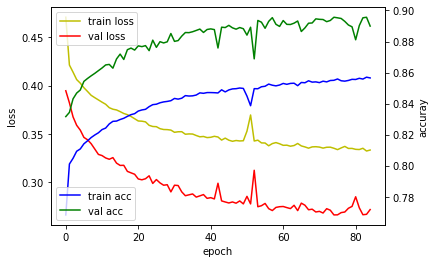

In [12]:
# 출처 https://tykimos.github.io/2017/07/09/Early_Stopping/

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [31]:
# epoch 1000, batch_size = 230 validation_split = 0.2 dropout = 0.1 , early stoppiong
train2_X = df_train_X.to_numpy()
model2 = Sequential()
model2.add(Dense(31))
model2.add(Dense(10))
model2.add(Dense(2, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=10),
             ModelCheckpoint(filepath=r'model/best_model2.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history2 = model2.fit(train2_X, train_y, epochs=1000, batch_size=230,
          validation_split= 0.2, callbacks=callbacks)

(323730, 240)
Epoch 1/1000
1127/1127 [==============================] - 4s 3ms/step - loss: 0.4583 - accuracy: 0.7972 - val_loss: 0.4282 - val_accuracy: 0.8164
Epoch 2/1000
1127/1127 [==============================] - 3s 3ms/step - loss: 0.4231 - accuracy: 0.8216 - val_loss: 0.4226 - val_accuracy: 0.8238
Epoch 3/1000
1127/1127 [==============================] - 3s 3ms/step - loss: 0.4209 - accuracy: 0.8237 - val_loss: 0.4194 - val_accuracy: 0.8241
Epoch 4/1000
1127/1127 [==============================] - 3s 3ms/step - loss: 0.4198 - accuracy: 0.8247 - val_loss: 0.4185 - val_accuracy: 0.8269
Epoch 5/1000
1127/1127 [==============================] - 3s 3ms/step - loss: 0.4192 - accuracy: 0.8251 - val_loss: 0.4194 - val_accuracy: 0.8264
Epoch 6/1000
1127/1127 [==============================] - 3s 3ms/step - loss: 0.4187 - accuracy: 0.8258 - val_loss: 0.4193 - val_accuracy: 0.8252
Epoch 7/1000
1127/1127 [==============================] - 3s 3ms/step - loss: 0.4184 - accuracy: 0.8262 - val_

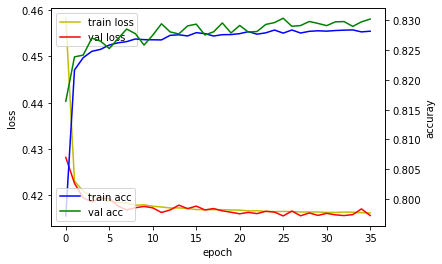

In [32]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history2.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [33]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 31)                7471      
_________________________________________________________________
dense_30 (Dense)             (None, 10)                320       
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 22        
Total params: 7,813
Trainable params: 7,813
Non-trainable params: 0
_________________________________________________________________


In [46]:
# epoch 1000, batch_size = 230 validation_split = 0.2 dropout = 0.1 
model3 = Sequential()
model3.add(LSTM(25,input_shape=(240,1) ,dropout=0.1))
model3.add(Dense(2, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=10),
             ModelCheckpoint(filepath=r'model/best_model3.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]
history3 = model.fit(train_X, train_y, epochs=1000, batch_size=230,
          validation_split= 0.2, callbacks=callbacks)

Epoch 1/1000
1127/1127 [==============================] - 14s 13ms/step - loss: 0.3415 - accuracy: 0.8490 - val_loss: 0.2880 - val_accuracy: 0.8832
Epoch 2/1000
1127/1127 [==============================] - 14s 13ms/step - loss: 0.3420 - accuracy: 0.8489 - val_loss: 0.2931 - val_accuracy: 0.8801
Epoch 3/1000
1127/1127 [==============================] - 14s 13ms/step - loss: 0.3425 - accuracy: 0.8485 - val_loss: 0.2903 - val_accuracy: 0.8830
Epoch 4/1000
1127/1127 [==============================] - 16s 14ms/step - loss: 0.3425 - accuracy: 0.8489 - val_loss: 0.2863 - val_accuracy: 0.8850
Epoch 5/1000
1127/1127 [==============================] - 15s 13ms/step - loss: 0.3413 - accuracy: 0.8496 - val_loss: 0.2928 - val_accuracy: 0.8777
Epoch 6/1000
1127/1127 [==============================] - 16s 14ms/step - loss: 0.3418 - accuracy: 0.8485 - val_loss: 0.2902 - val_accuracy: 0.8805
Epoch 7/1000
1127/1127 [==============================] - 15s 13ms/step - loss: 0.3415 - accuracy: 0.8485 - val_

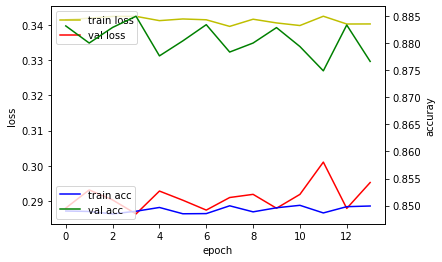

In [47]:
# 출처 https://tykimos.github.io/2017/07/09/Early_Stopping/

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history3.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history3.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [48]:
model3.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 25)                2700      
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 52        
Total params: 2,752
Trainable params: 2,752
Non-trainable params: 0
_________________________________________________________________
